In [1]:
import numpy as np
import pandas as pd
from K_Means_Clustering import Kmeans
from process import process_image
from matplotlib import pyplot as plt
import cv2

In [3]:
image=cv2.cvtColor(cv2.imread("faucet.jpeg"), cv2.COLOR_BGR2RGB)
new_image=process_image(image,k=2,max_iters=25)

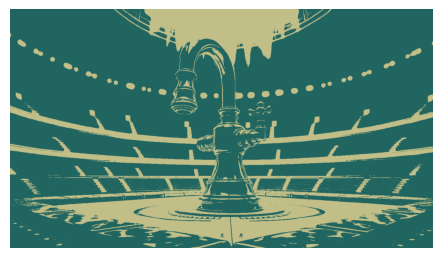

In [4]:
plt.figure(figsize=(12, 6)) 
plt.subplot(1, 2, 1)
plt.imshow(new_image)
plt.axis("off")
plt.show()

In [2]:
def get_pixel_vals(image):
    original_shape=image.shape
    pixel_values=image.reshape((-1,3))
    return pixel_values,original_shape
    
def reconstruct_img(centroids,idx,shape):
    reconstructed_image=np.round(centroids[idx]).astype(np.uint8)
    reconstructed_image=reconstructed_image.reshape(shape)
    return reconstructed_image
    
def plot_image(img_list):
    plt.figure(figsize=(20, 10)) 
    for i,img in enumerate(img_list):
        plt.subplot(1, 2, i+1)
        plt.imshow(img)
        plt.axis("off")
    plt.show()

In [3]:
def process_image(image_path,k,max_iters,plot=False):

    print("Extracting Pixel\n")
    image=cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    vals,shape=get_pixel_vals(image)

    print("Clustering\n")
    clusterer=Kmeans()
    clusterer.fit_kmeans(vals,k,max_iters)
    centroids,idx=clusterer.centroids,clusterer.assigned_centroids

    print("Reconstructing")
    new_img=reconstruct_img(centroids,idx,shape)

    if plot:
        print("Plotting")
        plot_image([image,new_img])


Extracting Pixel

Clustering

1
2
3
4
5
Reconstructing
Plotting


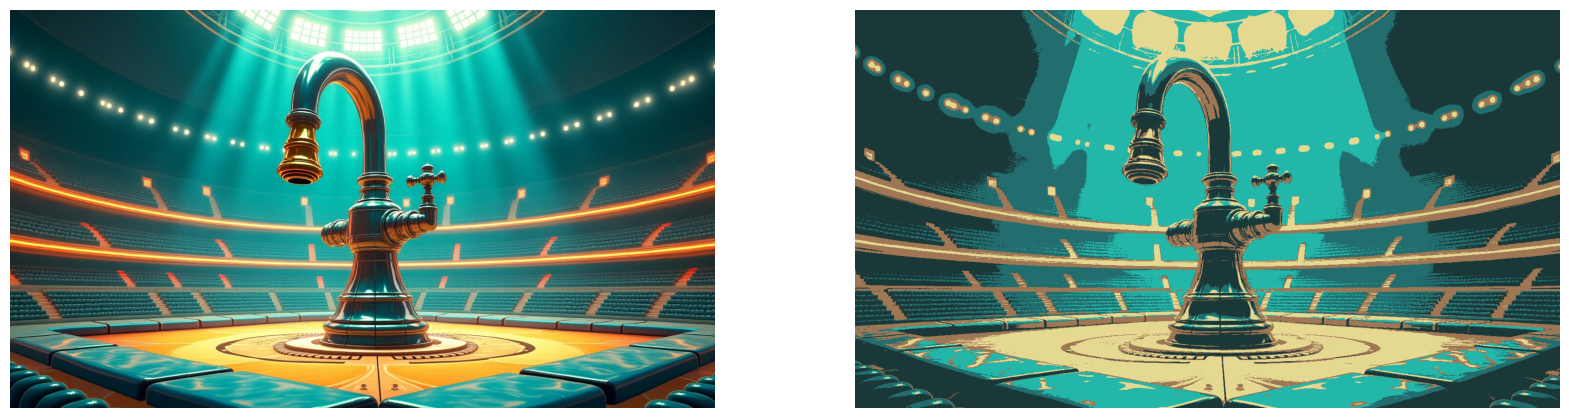

In [5]:
if __name__ == "__main__":
    process_image("faucet.jpeg",k=5,max_iters=5,plot=True)